    u1_sum   u2_sum   u3_sum   u4_sum   u5_sum  u1_mean  u2_mean  u3_mean  \
0  5202.76  6845.44  6203.15  7341.62  7098.12  5.20276  6.84544  6.20315   
1  7746.50  6436.21  7166.74  6825.20  6420.66  7.74650  6.43621  7.16674   
2  6553.72  6330.01  6924.02  7092.46  6313.15  6.55372  6.33001  6.92402   
3  6698.56  7759.66  6003.15  7088.00  5740.47  6.69856  7.75966  6.00315   
4  7153.70  5974.38  6278.68  7318.34  6781.17  7.15370  5.97438  6.27868   

   u4_mean  u5_mean     u1_std     u2_std     u3_std     u4_std     u5_std  \
0  7.34162  7.09812  15.988258  18.990185  16.885769  18.189889  18.946904   
1  6.82520  6.42066  19.972468  18.082565  19.953354  18.732705  18.151123   
2  7.09246  6.31315  18.003235  18.740392  18.345473  18.854542  17.272809   
3  7.08800  5.74047  18.970051  19.282801  17.688096  19.128344  16.495686   
4  7.31834  6.78117  19.998425  17.643585  16.624200  18.618151  18.496057   

   seller_mean_utility_per_round  
0                       75071.54 

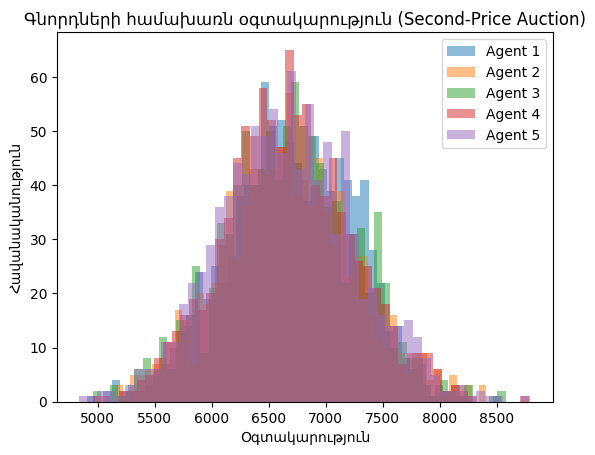

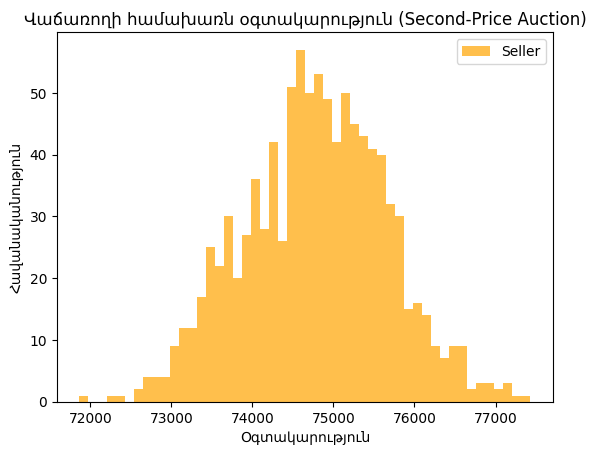

T-test between Agent 1 and Agent 2: t-stat = 1.2183327874342147, p-value = 0.22
T-test between Agent 1 and Agent 3: t-stat = 1.0313666275887168, p-value = 0.3
T-test between Agent 1 and Agent 4: t-stat = 1.2231246166921796, p-value = 0.22
T-test between Agent 1 and Agent 5: t-stat = 1.655976652039254, p-value = 0.1
T-test between Agent 2 and Agent 3: t-stat = -0.18878858622933808, p-value = 0.85
T-test between Agent 2 and Agent 4: t-stat = -0.01872468699367491, p-value = 0.99
T-test between Agent 2 and Agent 5: t-stat = 0.44497589066015647, p-value = 0.66
T-test between Agent 3 and Agent 4: t-stat = 0.17356138414723574, p-value = 0.86
T-test between Agent 3 and Agent 5: t-stat = 0.6332856280770257, p-value = 0.53
T-test between Agent 4 and Agent 5: t-stat = 0.4716033727485326, p-value = 0.64


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n_agents = 5  # Number of agents
n_simulations = 1000  # Number of simulations
theta_max = 100  # Maximum value for theta
n_auctions_per_simulation = 1000  # Number of auctions per simulation

# Initialize lists to store results
utility_sums = {f'u{i}_sum': [] for i in range(1, n_agents + 1)}
utility_means = {f'u{i}_mean': [] for i in range(1, n_agents + 1)}
utility_stds = {f'u{i}_std': [] for i in range(1, n_agents + 1)}
seller_mean_per_round = []

# Run the simulation multiple times
for _ in range(n_simulations):
    # Generate true valuations (thetas) for each agent for each auction
    thetas = [np.round(stats.norm.rvs(50, 50, n_auctions_per_simulation), 2) for _ in range(n_agents)]

    # In SPSB, each agent bids their true valuation
    bids = thetas

    # Create DataFrame for this simulation
    df = pd.DataFrame({f'theta{i+1}': thetas[i] for i in range(n_agents)})
    for i in range(n_agents):
        df[f'bid{i+1}'] = bids[i]

    # Determine the winning and second-highest bids
    max_bid = df[[f'bid{i+1}' for i in range(n_agents)]].max(axis=1)
    second_highest_bid = df[[f'bid{i+1}' for i in range(n_agents)]].apply(lambda row: sorted(row)[-2], axis=1)

    # Calculate utilities: Winning agent's utility is their true value minus the second-highest bid
    for i in range(n_agents):
        df[f'u{i+1}'] = np.where(df[f'bid{i+1}'] == max_bid, df[f'theta{i+1}'] - second_highest_bid, 0)

    # Calculate seller's total utility per auction (sum of second-highest bids)
    seller_mean_per_round.append(second_highest_bid.sum())

    # Append sums, means, and stds of utilities for each agent
    for i in range(n_agents):
        utility_sums[f'u{i+1}_sum'].append(df[f'u{i+1}'].sum())
        utility_means[f'u{i+1}_mean'].append(df[f'u{i+1}'].mean())
        utility_stds[f'u{i+1}_std'].append(df[f'u{i+1}'].std())

# Store results in a DataFrame
simulation_results_SPSB = pd.DataFrame({**utility_sums, **utility_means, **utility_stds, "seller_mean_utility_per_round": seller_mean_per_round})

# Display the first few rows of the results
print(simulation_results_SPSB.head())

# Summary statistics
for i in range(n_agents):
    print(f"Agent {i+1} - Utility Mean:", simulation_results_SPSB[f'u{i+1}_mean'].mean())
    print(f"Agent {i+1} - Utility Std Dev:", simulation_results_SPSB[f'u{i+1}_mean'].std())

# Seller's mean utility across all simulations
print("Seller - Overall Mean Utility Per Round:", simulation_results_SPSB["seller_mean_utility_per_round"].mean())
print("Seller - Utility Std Dev Per Round:", simulation_results_SPSB["seller_mean_utility_per_round"].std())

# Plot histograms for utility sums of each agent
for i in range(n_agents):
    plt.hist(simulation_results_SPSB[f'u{i+1}_sum'], bins=50, alpha=0.5, label=f'Agent {i+1}')
plt.legend()
plt.title("Գնորդների համախառն օգտակարություն (Second-Price Auction)")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.show()

# Plot histogram for seller's mean utility per round
plt.hist(simulation_results_SPSB["seller_mean_utility_per_round"], bins=50, alpha=0.7, color="orange", label="Seller")
plt.title("Վաճառողի համախառն օգտակարություն (Second-Price Auction)")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.legend()
plt.show()

# Perform pairwise t-tests between agents
for i in range(n_agents):
    for j in range(i + 1, n_agents):
        t_stat, p_val = stats.ttest_ind(simulation_results_SPSB[f'u{i+1}_sum'], simulation_results_SPSB[f'u{j+1}_sum'])
        print(f"T-test between Agent {i+1} and Agent {j+1}: t-stat = {t_stat}, p-value = {round(p_val, 2)}")

     u1_sum    u2_sum    u3_sum    u4_sum    u5_sum   u1_mean   u2_mean  \
0  6613.521  6050.301  6572.658  7300.530  5978.205  6.613521  6.050301   
1  6425.214  7124.916  6268.449  6583.821  6339.396  6.425214  7.124916   
2  6170.664  6458.742  6793.470  5914.131  7147.812  6.170664  6.458742   
3  6352.557  6283.356  7135.731  6247.455  6108.408  6.352557  6.283356   
4  5990.379  6724.764  6315.645  6636.498  6684.318  5.990379  6.724764   

    u3_mean   u4_mean   u5_mean     u1_std     u2_std     u3_std     u4_std  \
0  6.572658  7.300530  5.978205  13.788345  13.291856  13.623432  14.661632   
1  6.268449  6.583821  6.339396  13.685386  14.655846  13.517887  13.788849   
2  6.793470  5.914131  7.147812  13.301076  13.670632  14.047763  13.233330   
3  7.135731  6.247455  6.108408  13.360430  13.520509  14.297447  13.407696   
4  6.315645  6.636498  6.684318  13.100594  13.973321  13.611407  13.815990   

      u5_std  seller_mean_utility_per_round  
0  13.168719                

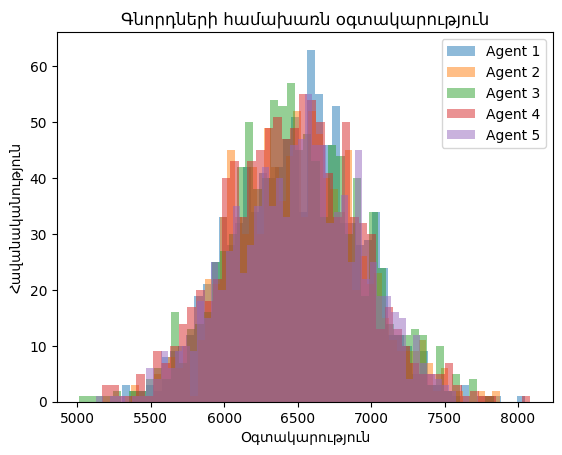

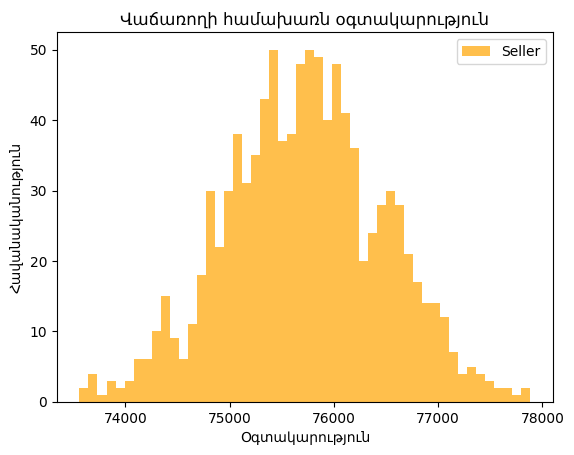

T-test between Agent 1 and Agent 2: t-stat = -0.13485773428450312, p-value = 0.89
T-test between Agent 1 and Agent 3: t-stat = -0.05673457728840439, p-value = 0.95
T-test between Agent 1 and Agent 4: t-stat = 1.3881920115571167, p-value = 0.17
T-test between Agent 1 and Agent 5: t-stat = -0.3142788742501282, p-value = 0.75
T-test between Agent 2 and Agent 3: t-stat = 0.07492229220167868, p-value = 0.94
T-test between Agent 2 and Agent 4: t-stat = 1.528638602132747, p-value = 0.13
T-test between Agent 2 and Agent 5: t-stat = -0.18125775933098326, p-value = 0.86
T-test between Agent 3 and Agent 4: t-stat = 1.4157763853114147, p-value = 0.16
T-test between Agent 3 and Agent 5: t-stat = -0.25089475459535604, p-value = 0.8
T-test between Agent 4 and Agent 5: t-stat = -1.6973816407147837, p-value = 0.09


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n_agents = 5  # Number of agents
n_simulations = 1000  # Number of simulations
theta_max = 100  # Maximum value for theta

# Define bidding strategies for each agent
bidding_strategies = [0.7, 0.7, 0.7, 0.7, 0.7]  # Define your custom strategies here

# Initialize lists to store results
utility_sums = {f'u{i}_sum': [] for i in range(1, n_agents + 1)}
utility_means = {f'u{i}_mean': [] for i in range(1, n_agents + 1)}
utility_stds = {f'u{i}_std': [] for i in range(1, n_agents + 1)}
seller_mean_per_round = []

# Run the simulation multiple times
for _ in range(n_simulations):
    # Generate new theta values for each agent
    thetas = [np.round(stats.norm.rvs(50, 50, size=1000), 2) for _ in range(n_agents)]

    # Calculate bids based on each agent's custom bidding strategy
    bids = [theta * bidding_strategies[i] for i, theta in enumerate(thetas)]

    # Create DataFrame for this iteration
    df = pd.DataFrame({f'theta{i+1}': thetas[i] for i in range(n_agents)})
    for i in range(n_agents):
        df[f'bid{i+1}'] = bids[i]

    # Determine the winning bid and calculate utilities
    max_bid = df[[f'bid{i+1}' for i in range(n_agents)]].max(axis=1)
    for i in range(n_agents):
        df[f'u{i+1}'] = np.where(df[f'bid{i+1}'] == max_bid, df[f'theta{i+1}'] - df[f'bid{i+1}'], 0)

    # Calculate seller's mean utility per auction (average winning bid) for this simulation
    seller_mean_per_round.append(max_bid.sum())

    # Append sums, means, and stds of utilities for each agent
    for i in range(n_agents):
        utility_sums[f'u{i+1}_sum'].append(df[f'u{i+1}'].sum())
        utility_means[f'u{i+1}_mean'].append(df[f'u{i+1}'].mean())
        utility_stds[f'u{i+1}_std'].append(df[f'u{i+1}'].std())

# Store results in a DataFrame
simulation_results = pd.DataFrame({**utility_sums, **utility_means, **utility_stds, "seller_mean_utility_per_round": seller_mean_per_round})

# Display the first few rows of the results
print(simulation_results.head())

# Summary statistics
for i in range(n_agents):
    print(f"Agent {i+1} - Utility Mean:", simulation_results[f'u{i+1}_mean'].mean())
    print(f"Agent {i+1} - Utility Std Dev:", simulation_results[f'u{i+1}_mean'].std())

# Seller's mean utility across all simulations
print("Seller - Overall Mean Utility Per Round:", simulation_results["seller_mean_utility_per_round"].mean())
print("Seller - Utility Std Dev Per Round:", simulation_results["seller_mean_utility_per_round"].std())

# Plot histograms for utility sums of each agent
for i in range(n_agents):
    plt.hist(simulation_results[f'u{i+1}_sum'], bins=50, alpha=0.5, label=f'Agent {i+1}')
plt.legend()
plt.title("Գնորդների համախառն օգտակարություն")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.show()

# Plot histogram for seller's mean utility per round
plt.hist(simulation_results["seller_mean_utility_per_round"], bins=50, alpha=0.7, color="orange", label="Seller")
plt.title("Վաճառողի համախառն օգտակարություն")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.legend()
plt.show()

# Perform pairwise t-tests between agents
for i in range(n_agents):
    for j in range(i+1, n_agents):
        t_stat, p_val = stats.ttest_ind(simulation_results[f'u{i+1}_sum'], simulation_results[f'u{j+1}_sum'])
        print(f"T-test between Agent {i+1} and Agent {j+1}: t-stat = {t_stat}, p-value = {round(p_val,2)}")


In [ ]:
simulation_results

,u1_sum,u2_sum,u3_sum,u4_sum,u5_sum,u1_mean,u2_mean,u3_mean,u4_mean,u5_mean,u1_std,u2_std,u3_std,u4_std,u5_std,seller_mean_utility_per_round
0,6613.521,6050.301,6572.658,7300.530,5978.205,6.613521,6.050301,6.572658,7.300530,5.978205,13.788345,13.291856,13.623432,14.661632,13.168719,75868.835
1,6425.214,7124.916,6268.449,6583.821,6339.396,6.425214,7.124916,6.268449,6.583821,6.339396,13.685386,14.655846,13.517887,13.788849,13.652163,76397.524
2,6170.664,6458.742,6793.470,5914.131,7147.812,6.170664,6.458742,6.793470,5.914131,7.147812,13.301076,13.670632,14.047763,13.233330,14.478287,75797.911
3,6352.557,6283.356,7135.731,6247.455,6108.408,6.352557,6.283356,7.135731,6.247455,6.108408,13.360430,13.520509,14.297447,13.407696,13.523315,74964.183
4,5990.379,6724.764,6315.645,6636.498,6684.318,5.990379,6.724764,6.315645,6.636498,6.684318,13.100594,13.973321,13.611407,13.815990,13.963814,75487.076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6485.409,5872.914,7134.822,6851.574,5913.231,6.485409,5.872914,7.134822,6.851574,5.913231,14.035699,12.959725,14.012033,14.086609,13.324576,75268.550
996,6690.672,6058.818,6025.143,6417.291,7150.521,6.690672,6.058818,6.025143,6.417291,7.150521,13.918473,13.432850,13.210922,13.702776,14.207952,75465.705
997,7221.132,6574.902,5761.296,6672.315,5588.280,7.221132,6.574902,5.761296,6.672315,5.588280,14.240645,13.673799,13.186516,13.590074,12.721492,74241.825
998,6857.391,5881.122,6903.876,6591.759,6136.134,6.857391,5.881122,6.903876,6.591759,6.136134,14.091972,13.463902,13.852845,13.684080,13.504742,75530.658


In [ ]:
simulation_results_SPSB

,u1_sum,u2_sum,u3_sum,u4_sum,u5_sum,u1_mean,u2_mean,u3_mean,u4_mean,u5_mean,u1_std,u2_std,u3_std,u4_std,u5_std,seller_mean_utility_per_round
0,5202.76,6845.44,6203.15,7341.62,7098.12,5.20276,6.84544,6.20315,7.34162,7.09812,15.988258,18.990185,16.885769,18.189889,18.946904,75071.54
1,7746.50,6436.21,7166.74,6825.20,6420.66,7.74650,6.43621,7.16674,6.82520,6.42066,19.972468,18.082565,19.953354,18.732705,18.151123,74952.32
2,6553.72,6330.01,6924.02,7092.46,6313.15,6.55372,6.33001,6.92402,7.09246,6.31315,18.003235,18.740392,18.345473,18.854542,17.272809,74194.98
3,6698.56,7759.66,6003.15,7088.00,5740.47,6.69856,7.75966,6.00315,7.08800,5.74047,18.970051,19.282801,17.688096,19.128344,16.495686,74763.17
4,7153.70,5974.38,6278.68,7318.34,6781.17,7.15370,5.97438,6.27868,7.31834,6.78117,19.998425,17.643585,16.624200,18.618151,18.496057,74866.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7017.22,6386.71,6128.36,6893.24,7654.33,7.01722,6.38671,6.12836,6.89324,7.65433,18.673510,19.036882,17.221029,19.467985,19.854318,76027.29
996,7154.64,6999.91,6481.67,6625.19,6853.46,7.15464,6.99991,6.48167,6.62519,6.85346,19.344698,18.605419,18.380548,17.974917,18.533212,74756.51
997,6725.06,7673.70,7261.76,5985.45,7045.34,6.72506,7.67370,7.26176,5.98545,7.04534,18.734582,20.709268,19.076006,17.222088,18.196320,73727.12
998,6661.89,7290.39,6200.55,6858.05,6594.29,6.66189,7.29039,6.20055,6.85805,6.59429,17.863381,19.447546,17.898336,18.407390,17.795020,73916.98


In [ ]:
simulation_results["seller_mean_utility_per_round"]
simulation_results_SPSB["seller_mean_utility_per_round"]

,seller_mean_utility_per_round
0,75071.54
1,74952.32
2,74194.98
3,74763.17
4,74866.26
...,...
995,76027.29
996,74756.51
997,73727.12
998,73916.98


In [ ]:
stats.ttest_ind(simulation_results["u3_sum"], simulation_results_SPSB["u3_sum"])

TtestResult(statistic=2.328150193909661, pvalue=0.020003485093525054, df=1998.0)

In [ ]:
round(stats.ttest_ind(simulation_results["seller_mean_utility_per_round"], simulation_results_SPSB["seller_mean_utility_per_round"]).pvalue,2)

0.0